In [3]:
! pip install pywph==1.0

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pywph as pw
import numpy as np
import torch


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
params = pd.read_csv('drive/MyDrive/camels data/params.csv')
nbody_file = np.load('drive/MyDrive/camels data/Maps_Mtot_Nbody_SIMBA_LH_z=0.00.npy')
mgas_file = np.load('drive/MyDrive/camels data/Maps_Mgas_SIMBA_LH_z=0.00.npy')
#wph_coeffs_1000 = pd.read_csv('drive/MyDrive/camels data/wph_coeffs_1000.csv')

Single analysis of n-body simulation

In [6]:
nbody = np.copy(nbody_file[0])
data = np.log(nbody)

In [7]:
M = 256
N = 256
J = 7
L = 4
dn =0

wph_op = pw.WPHOp(M, N, J, L=L, dn=dn) # operator
coeff = wph_op(data, pbc=True) # get coefficients
wph = wph_op(data, ret_wph_obj=True)

if torch.cuda.is_available():
    wph_op.to(0)


In [8]:
coeff.shape

torch.Size([520])

In [9]:
num = 1000
wph_coeffs_1000 = np.zeros((num,520),dtype='complex')
for i in range(0,num):
  nbody = np.copy(nbody_file[i])
  data = np.log(nbody)
  wph_op = pw.WPHOp(M, N, J, L=L, dn=dn) # operator
  coeff = wph_op(data,pbc=True)
  wph_coeffs_1000[i] = coeff


In [10]:
wph_coeffs_1000 = pd.DataFrame(wph_coeffs_1000)
#wph_coeffs_1000.to_csv('drive/MyDrive/camels data/wph_coeffs_1000.csv')

In [11]:
#wph_coeffs_1000 = pd.read_csv('drive/MyDrive/camels data/wph_coeffs_1000.csv')
#wph_coeffs_1000 = wph_coeffs_1000.iloc[:,1:]

In [12]:
wph_coeffs_1000

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
0,0.007378+0.000000j,0.006862+0.000000j,0.007910+0.000000j,0.006769+0.000000j,0.009569+0.000000j,0.009798+0.000000j,0.010389+0.000000j,0.009766+0.000000j,0.012501+0.000000j,0.012165+0.000000j,...,0.173972+0.000000j,0.382934+0.000000j,0.053052+0.000000j,0.138739+0.000000j,0.037507+0.000000j,0.033801+0.000000j,0.014613+0.000000j,0.039876+0.000000j,0.002625+0.000000j,0.000599+0.000000j
1,0.006981+0.000000j,0.006471+0.000000j,0.007083+0.000000j,0.005916+0.000000j,0.009516+0.000000j,0.009569+0.000000j,0.009556+0.000000j,0.008487+0.000000j,0.012319+0.000000j,0.011757+0.000000j,...,0.119470+0.000000j,0.193308+0.000000j,0.053416+0.000000j,0.157172+0.000000j,0.038042+0.000000j,0.035352+0.000000j,0.016450+0.000000j,0.056838+0.000000j,0.004059+0.000000j,0.001291+0.000000j
2,0.008057+0.000000j,0.007209+0.000000j,0.008059+0.000000j,0.006846+0.000000j,0.010633+0.000000j,0.010299+0.000000j,0.010334+0.000000j,0.009483+0.000000j,0.014056+0.000000j,0.012821+0.000000j,...,0.112930+0.000000j,0.191534+0.000000j,0.032561+0.000000j,0.116597+0.000000j,0.015683+0.000000j,0.010190+0.000000j,0.012370+0.000000j,0.042370+0.000000j,0.001983+0.000000j,0.000442+0.000000j
3,0.006782+0.000000j,0.006067+0.000000j,0.006622+0.000000j,0.005861+0.000000j,0.009017+0.000000j,0.009099+0.000000j,0.009319+0.000000j,0.008650+0.000000j,0.011928+0.000000j,0.011492+0.000000j,...,0.089796+0.000000j,0.123720+0.000000j,0.035953+0.000000j,0.096020+0.000000j,0.016669+0.000000j,0.009461+0.000000j,0.009392+0.000000j,0.029223+0.000000j,0.001116+0.000000j,0.000177+0.000000j
4,0.006993+0.000000j,0.006495+0.000000j,0.007282+0.000000j,0.006175+0.000000j,0.009120+0.000000j,0.009575+0.000000j,0.009830+0.000000j,0.008734+0.000000j,0.012169+0.000000j,0.011988+0.000000j,...,0.152829+0.000000j,0.365411+0.000000j,0.045472+0.000000j,0.120841+0.000000j,0.033121+0.000000j,0.031480+0.000000j,0.012244+0.000000j,0.046859+0.000000j,0.002336+0.000000j,0.000599+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.008927+0.000000j,0.008069+0.000000j,0.009020+0.000000j,0.008092+0.000000j,0.012361+0.000000j,0.012382+0.000000j,0.012164+0.000000j,0.012097+0.000000j,0.017200+0.000000j,0.017683+0.000000j,...,0.139192+0.000000j,0.233133+0.000000j,0.058900+0.000000j,0.165030+0.000000j,0.044583+0.000000j,0.041597+0.000000j,0.023883+0.000000j,0.069778+0.000000j,0.007695+0.000000j,0.003089+0.000000j
996,0.009559+0.000000j,0.008541+0.000000j,0.009438+0.000000j,0.008478+0.000000j,0.012846+0.000000j,0.012687+0.000000j,0.012604+0.000000j,0.012199+0.000000j,0.016481+0.000000j,0.016611+0.000000j,...,0.181976+0.000000j,0.384779+0.000000j,0.053491+0.000000j,0.158052+0.000000j,0.045639+0.000000j,0.050688+0.000000j,0.011606+0.000000j,0.039440+0.000000j,0.002054+0.000000j,0.000474+0.000000j
997,0.010040+0.000000j,0.009111+0.000000j,0.009924+0.000000j,0.008738+0.000000j,0.013338+0.000000j,0.013082+0.000000j,0.012886+0.000000j,0.012426+0.000000j,0.017363+0.000000j,0.017270+0.000000j,...,0.409529+0.000000j,1.394367+0.000000j,0.090820+0.000000j,0.260068+0.000000j,0.104501+0.000000j,0.156197+0.000000j,0.032738+0.000000j,0.113248+0.000000j,0.015700+0.000000j,0.009805+0.000000j
998,0.008122+0.000000j,0.006986+0.000000j,0.007713+0.000000j,0.006861+0.000000j,0.011393+0.000000j,0.009899+0.000000j,0.010038+0.000000j,0.010104+0.000000j,0.015474+0.000000j,0.012864+0.000000j,...,0.193727+0.000000j,0.478294+0.000000j,0.036432+0.000000j,0.099981+0.000000j,0.020172+0.000000j,0.014118+0.000000j,0.005535+0.000000j,0.022290+0.000000j,0.000445+0.000000j,0.000051+0.000000j


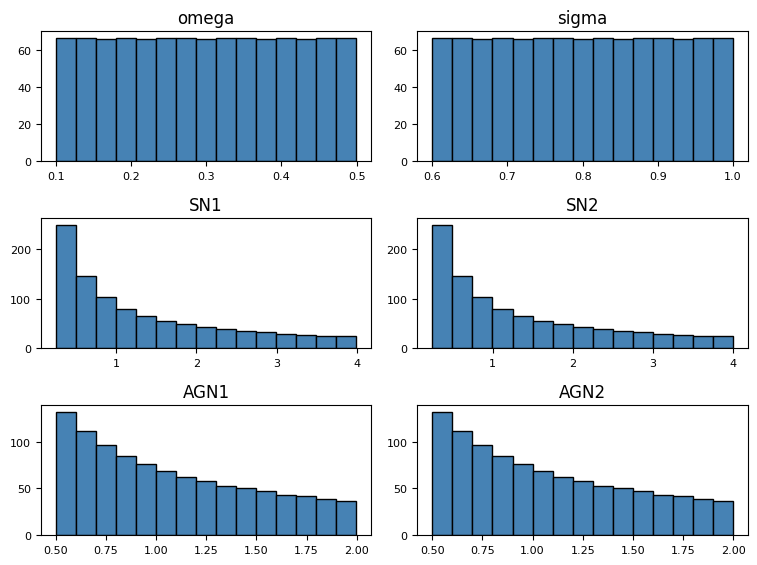

In [127]:
# parameters
params.hist(bins=15, color='steelblue',edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0, 1.2, 1.2))

In [13]:
params

,omega,sigma,SN1,SN2,AGN1,AGN2
0,0.1462,0.6242,2.87986,0.57995,0.91447,0.69786
1,0.1198,0.7926,1.46815,2.03073,0.58601,0.90063
2,0.4226,0.9034,2.59188,0.37113,0.56370,1.33700
3,0.2398,0.7182,2.09943,0.37945,1.80876,1.08147
4,0.3742,0.8910,0.26316,2.93630,1.59660,1.09505
...,...,...,...,...,...,...
995,0.1254,0.7338,0.32488,1.00975,0.64752,1.01748
996,0.1646,0.7682,1.64947,0.75054,0.73969,0.67877
997,0.3018,0.8182,0.69448,0.28837,0.57157,0.54299
998,0.2970,0.6314,2.80889,1.71000,1.69232,0.76154


In [81]:
def PCA(data, num_components):
    """calculate the principal components"""

    # standardise the data
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    data_standard = (data - mean)#/std

    # covariance matrix
    cov_mat = np.cov(data_standard, rowvar = False)

    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat) # values and directions

    # sort principal components
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    # project onto the new space
    X_reduced = np.dot(eigenvector_subset.transpose(), data_standard.transpose() ).transpose()

    return X_reduced


In [82]:
def PCA_weight(data, num_components):
    """calculate the weighting of each WPH coefficient"""

    # standardise the data
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    data_standard = (data - mean)#/std

    # covariance matrix
    cov_mat = np.cov(data_standard, rowvar = False)

    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat) # values and directions

    # sort principal components
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    pca_weight = eigenvector_subset.T

    return pca_weight

In [69]:
pcs = PCA(wph_coeffs_1000,2)
pcs.shape

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:906: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(nanvar(values, axis=axis, skipna=skipna, ddof=ddof, mask=mask))


(1000, 2)

Text(0, 0.5, 'component 2')

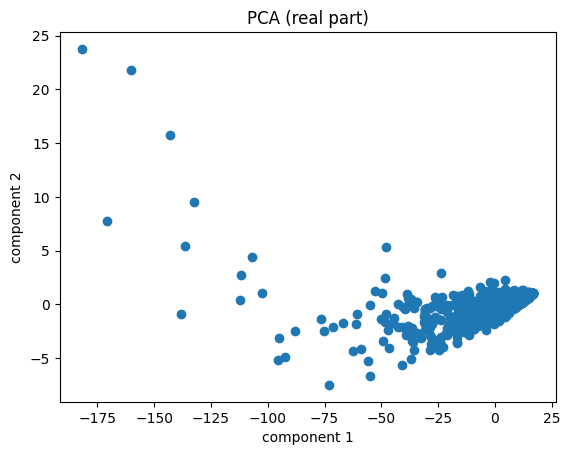

In [77]:
plt.scatter((pcs[:,0]).real,(pcs[:,1]).real)
plt.title('PCA (real part)')
plt.xlabel('component 1')
plt.ylabel('component 2')

Text(0, 0.5, 'component 2')

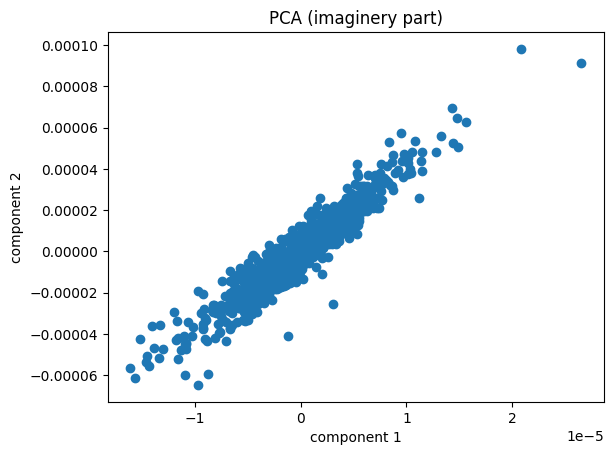

In [17]:
plt.scatter((pcs[:,0]).imag,(pcs[:,1]).imag)
plt.title('PCA (imaginery part)')
plt.xlabel('component 1')
plt.ylabel('component 2')

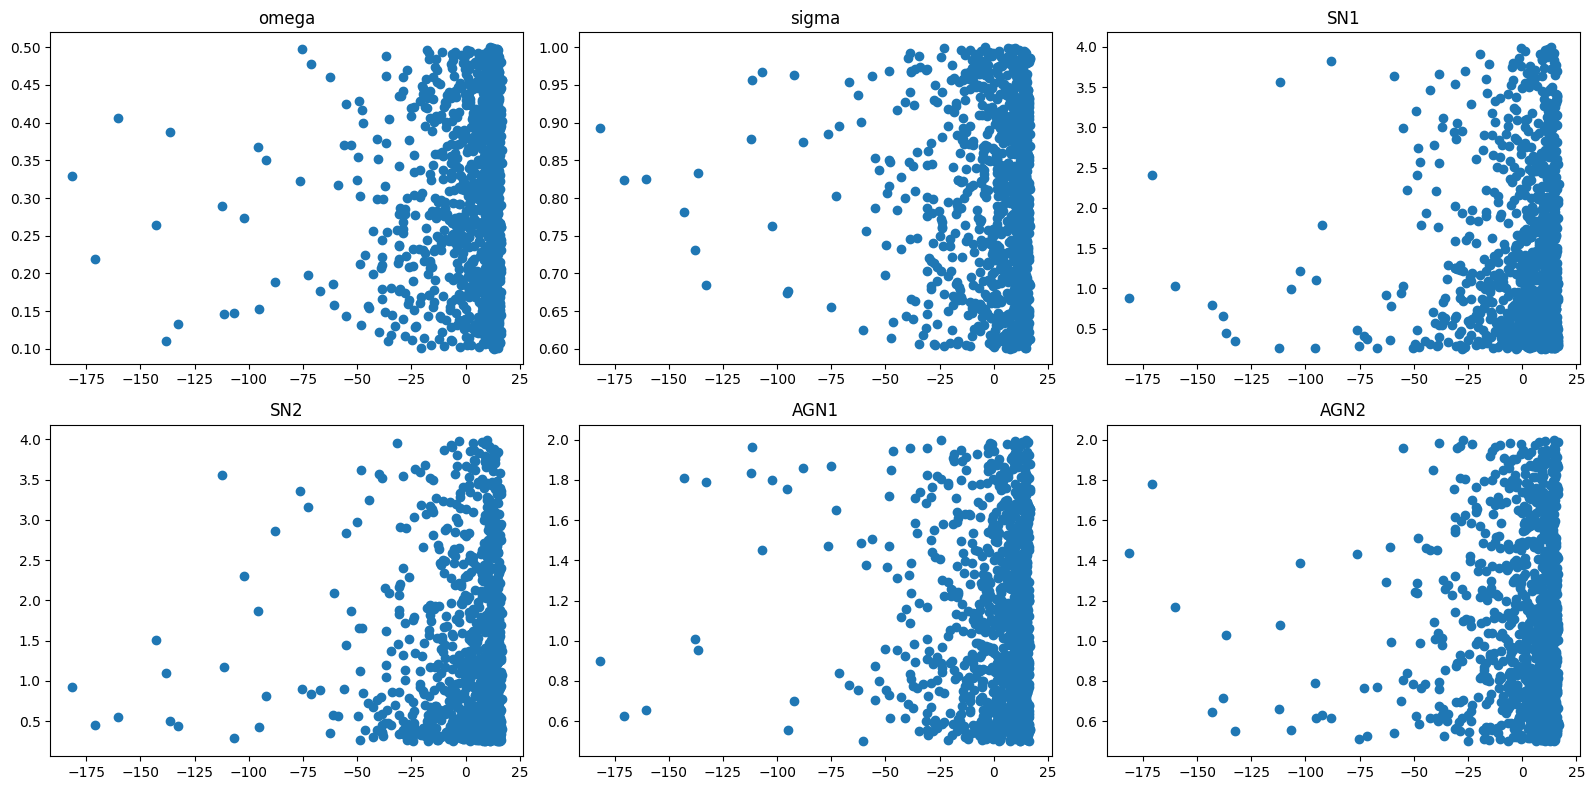

In [18]:
# pc1 real part
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0,0].set_title('omega')
axs[0,1].set_title('sigma')
axs[0,2].set_title('SN1')
axs[1,0].set_title('SN2')
axs[1,1].set_title('AGN1')
axs[1,2].set_title('AGN2')

axs[0,0].scatter((pcs[:,0]).real,params['omega'])
axs[0,1].scatter((pcs[:,0]).real,params['sigma'])
axs[0,2].scatter((pcs[:,0]).real,params['SN1'])
axs[1,0].scatter((pcs[:,0]).real,params['SN2'])
axs[1,1].scatter((pcs[:,0]).real,params['AGN1'])
axs[1,2].scatter((pcs[:,0]).real,params['AGN2'])


fig.tight_layout()
fig.show()

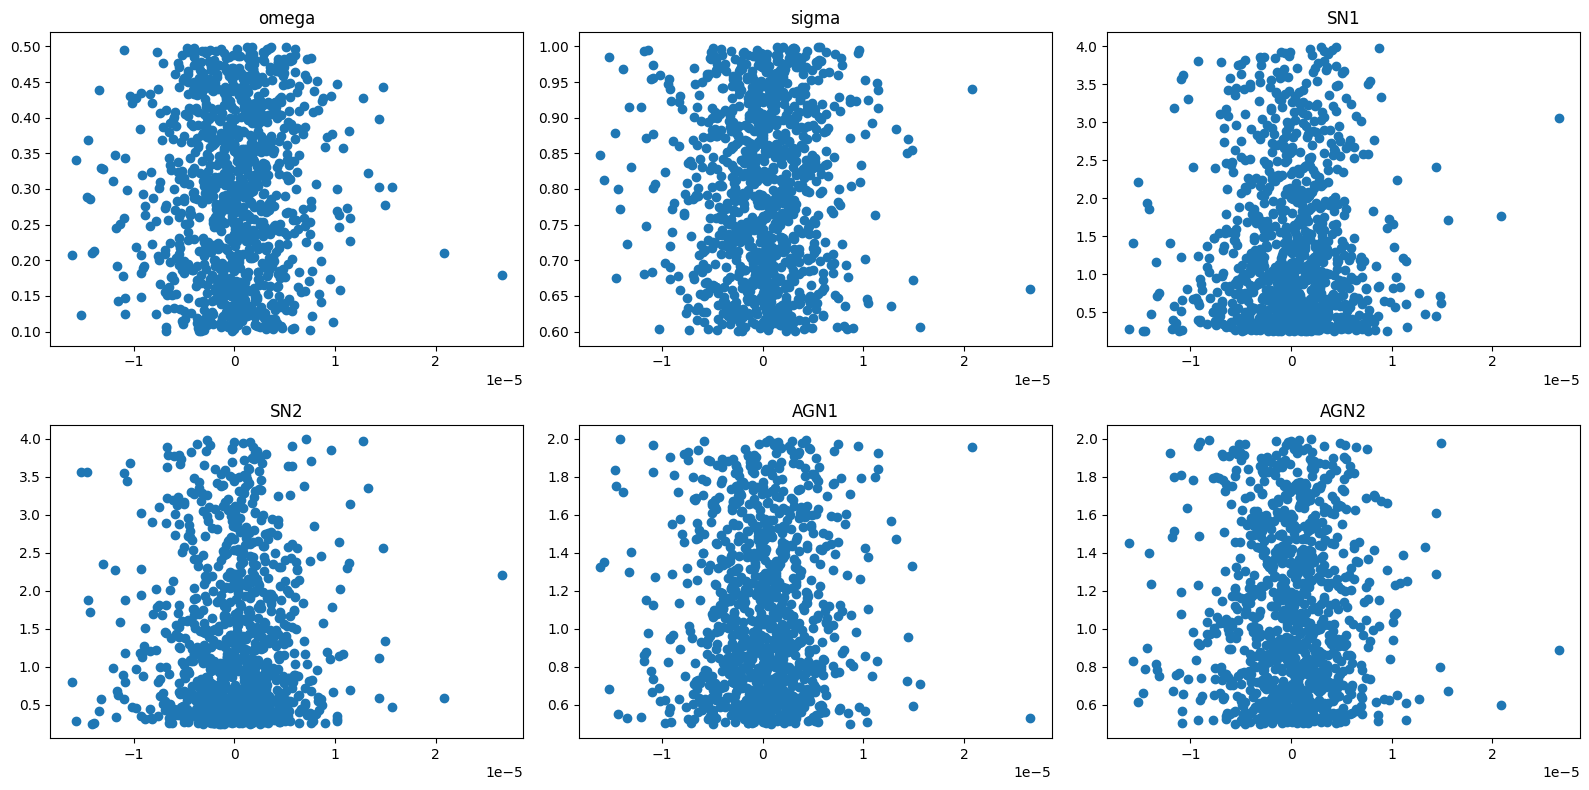

In [19]:
# pc1 imag part
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0,0].set_title('omega')
axs[0,1].set_title('sigma')
axs[0,2].set_title('SN1')
axs[1,0].set_title('SN2')
axs[1,1].set_title('AGN1')
axs[1,2].set_title('AGN2')

axs[0,0].scatter((pcs[:,0]).imag,params['omega'])
axs[0,1].scatter((pcs[:,0]).imag,params['sigma'])
axs[0,2].scatter((pcs[:,0]).imag,params['SN1'])
axs[1,0].scatter((pcs[:,0]).imag,params['SN2'])
axs[1,1].scatter((pcs[:,0]).imag,params['AGN1'])
axs[1,2].scatter((pcs[:,0]).imag,params['AGN2'])


fig.tight_layout()
fig.show()

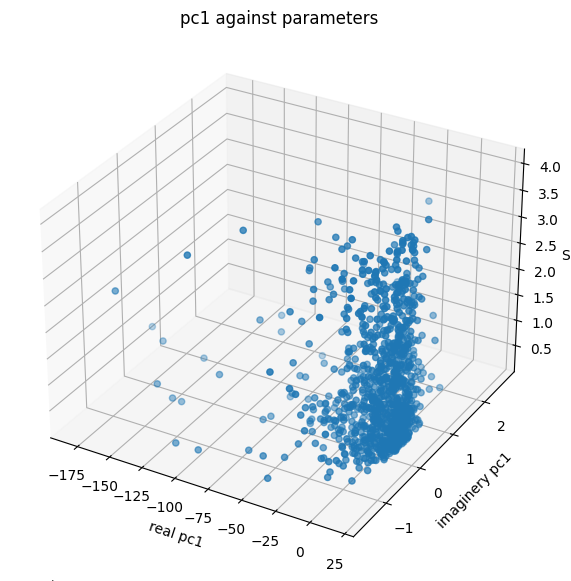

In [63]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D((pcs[:,0]).real,(pcs[:,0]).imag, params['SN1'])
ax.set_xlabel('real pc1')
ax.set_ylabel('imaginery pc1')
ax.set_zlabel('SN1')
plt.title("pc1 against parameters")
plt.show()

Text(0, 0.5, 'pc1 imaginary')

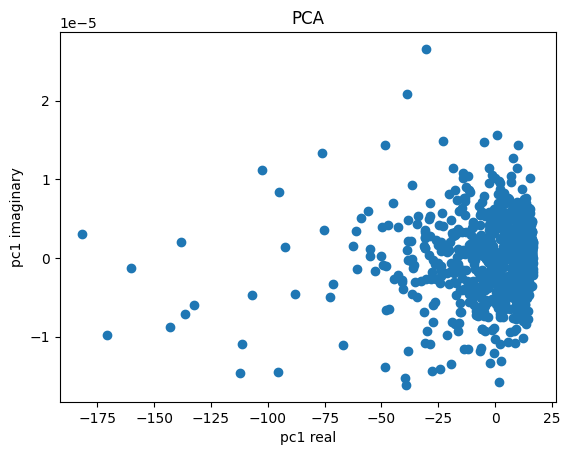

In [22]:
plt.scatter((pcs[:,0]).real, (pcs[:,0]).imag)
plt.title('PCA')
plt.xlabel('pc1 real')
plt.ylabel('pc1 imaginary')

In [90]:
weight1 = PCA_weight(wph_coeffs_1000, 2)[0]
pd.DataFrame(weight1)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:906: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(nanvar(values, axis=axis, skipna=skipna, ddof=ddof, mask=mask))


,0
0,-0.000011+0.000000j
1,-0.000010+0.000000j
2,-0.000011+0.000000j
3,-0.000010+0.000000j
4,-0.000007-0.000000j
...,...
515,-0.024247+0.000000j
516,-0.000476-0.000000j
517,-0.001446-0.000000j
518,-0.000541-0.000000j


Joint analysis of n-body and mgas simulation

In [24]:
nbody = np.copy(nbody_file[0])
nbody_data = np.log(nbody)

mgas = np.copy(mgas_file[0])
mgas_data = np.log(mgas)

In [25]:
M = 256
N = 256
J = 7
L = 4
dn =0

wph_op = pw.WPHOp(M, N, J, L=L, dn=dn)
wph_op.load_model(cross_moments=True)
joint_coeff = wph_op([nbody_data, mgas_data], cross=True, pbc=True)

In [26]:
joint_coeff.shape

torch.Size([968])

In [51]:
num = 1000
wph_joint_coeffs_1000 = np.zeros((num,968), dtype='complex')
for i in range(0,num):
  nbody = np.copy(nbody_file[i])
  nbody_data = np.log(nbody)
  mgas = np.copy(mgas_file[i])
  mgas_data = np.log(mgas)

  wph_op = pw.WPHOp(M, N, J, L=L, dn=dn)
  wph_op.load_model(cross_moments=True)
  joint_coeff = wph_op([nbody_data, mgas_data], cross=True, pbc=True)
  wph_joint_coeffs_1000[i] = joint_coeff


In [52]:
wph_joint_coeffs_1000 = pd.DataFrame(wph_joint_coeffs_1000)

In [53]:
wph_joint_coeffs_1000

,0,1,2,3,4,5,6,7,8,9,...,958,959,960,961,962,963,964,965,966,967
0,0.001675+0.000004j,0.001617-0.000012j,0.001895-0.000010j,0.001631-0.000015j,0.004561+0.000008j,0.004617-0.000078j,0.005047-0.000001j,0.004853-0.000013j,0.009181+0.000019j,0.008755-0.000153j,...,0.198805+0.000000j,0.450280+0.000000j,0.058965+0.000000j,0.154138+0.000000j,0.046526+0.000000j,0.046808+0.000000j,0.016177+0.000000j,0.044208+0.000000j,0.003221+0.000000j,0.000814+0.000000j
1,0.001794+0.000012j,0.001604+0.000016j,0.001720+0.000003j,0.001473-0.000027j,0.004895+0.000051j,0.004684+0.000020j,0.004836+0.000033j,0.004300-0.000027j,0.009616+0.000087j,0.008989+0.000035j,...,0.131349+0.000000j,0.223560+0.000000j,0.056525+0.000000j,0.167048+0.000000j,0.043620+0.000000j,0.043897+0.000000j,0.017844+0.000000j,0.060026+0.000000j,0.004691+0.000000j,0.001589+0.000000j
2,0.002035+0.000019j,0.001772+0.000010j,0.001888-0.000007j,0.001628+0.000011j,0.005516+0.000044j,0.005054-0.000009j,0.004916+0.000021j,0.004466+0.000079j,0.010910-0.000042j,0.009699-0.000101j,...,0.131519+0.000000j,0.243291+0.000000j,0.035676+0.000000j,0.128673+0.000000j,0.018786+0.000000j,0.013431+0.000000j,0.013320+0.000000j,0.046714+0.000000j,0.002302+0.000000j,0.000559+0.000000j
3,0.001590+0.000015j,0.001448+0.000006j,0.001539+0.000008j,0.001396+0.000004j,0.004472+0.000016j,0.004492+0.000027j,0.004784+0.000062j,0.004330+0.000043j,0.009209-0.000020j,0.008859+0.000048j,...,0.103598+0.000000j,0.153457+0.000000j,0.039475+0.000000j,0.106462+0.000000j,0.020585+0.000000j,0.013112+0.000000j,0.010985+0.000000j,0.033057+0.000000j,0.001473+0.000000j,0.000264+0.000000j
4,0.001548+0.000015j,0.001498+0.000026j,0.001600+0.000035j,0.001321+0.000033j,0.004327+0.000029j,0.004663+0.000015j,0.004731+0.000035j,0.003959+0.000024j,0.008936-0.000041j,0.009133-0.000134j,...,0.192883+0.000000j,0.510536+0.000000j,0.053903+0.000000j,0.141332+0.000000j,0.046561+0.000000j,0.052130+0.000000j,0.014663+0.000000j,0.055136+0.000000j,0.003405+0.000000j,0.001048+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.003031+0.000019j,0.002777-0.000053j,0.003024-0.000039j,0.002755-0.000032j,0.007051+0.000030j,0.007069-0.000134j,0.006863-0.000101j,0.006727-0.000020j,0.013121-0.000158j,0.013538-0.000209j,...,0.184673+0.000000j,0.356118+0.000000j,0.069574+0.000000j,0.195546+0.000000j,0.060267+0.000000j,0.065372+0.000000j,0.028060+0.000000j,0.082765+0.000000j,0.010603+0.000000j,0.005034+0.000000j
996,0.003189+0.000026j,0.002885+0.000013j,0.003075+0.000007j,0.002751+0.000002j,0.006780+0.000050j,0.006647-0.000072j,0.006461+0.000041j,0.006185-0.000033j,0.011717+0.000090j,0.011506-0.000073j,...,0.184679+0.000000j,0.373819+0.000000j,0.054516+0.000000j,0.169097+0.000000j,0.045404+0.000000j,0.048966+0.000000j,0.010939+0.000000j,0.042059+0.000000j,0.001783+0.000000j,0.000405+0.000000j
997,0.003201+0.000001j,0.002900-0.000002j,0.003102+0.000014j,0.002726+0.000049j,0.006736-0.000001j,0.006498+0.000015j,0.006431+0.000046j,0.006032+0.000060j,0.011915-0.000029j,0.011580+0.000078j,...,0.536165+0.000000j,2.043766+0.000000j,0.108622+0.000000j,0.316928+0.000000j,0.149308+0.000000j,0.266622+0.000000j,0.040334+0.000000j,0.138623+0.000000j,0.023546+0.000000j,0.017965+0.000000j
998,0.002647+0.000009j,0.002188-0.000010j,0.002355-0.000024j,0.002125+0.000014j,0.006385+0.000072j,0.005284-0.000008j,0.005307-0.000079j,0.005338+0.000025j,0.011778+0.000140j,0.009676-0.000080j,...,0.268144+0.000000j,0.763067+0.000000j,0.045908+0.000000j,0.126657+0.000000j,0.031826+0.000000j,0.027125+0.000000j,0.007250+0.000000j,0.030054+0.000000j,0.000753+0.000000j,0.000113+0.000000j


In [54]:
joint_pcs = PCA(wph_joint_coeffs_1000,2)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:906: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(nanvar(values, axis=axis, skipna=skipna, ddof=ddof, mask=mask))


Text(0, 0.5, 'component 2')

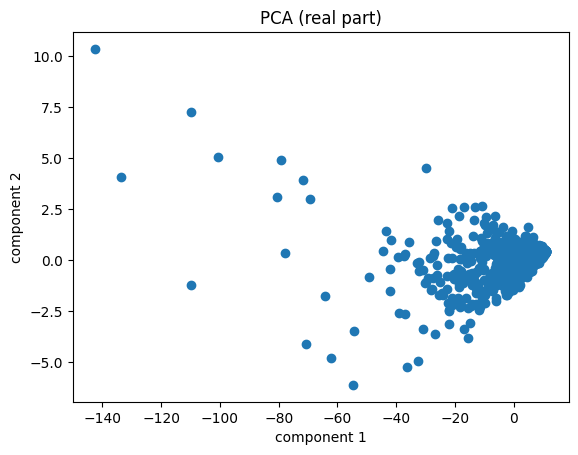

In [55]:
plt.scatter((joint_pcs[:,0]).real,(joint_pcs[:,1]).real)
plt.title('PCA (real part)')
plt.xlabel('component 1')
plt.ylabel('component 2')

Text(0, 0.5, 'component 2')

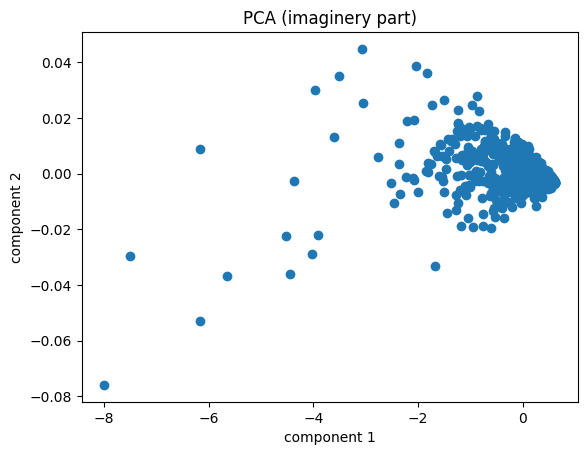

In [56]:
plt.scatter((joint_pcs[:,0]).imag,(joint_pcs[:,1]).imag)
plt.title('PCA (imaginery part)')
plt.xlabel('component 1')
plt.ylabel('component 2')

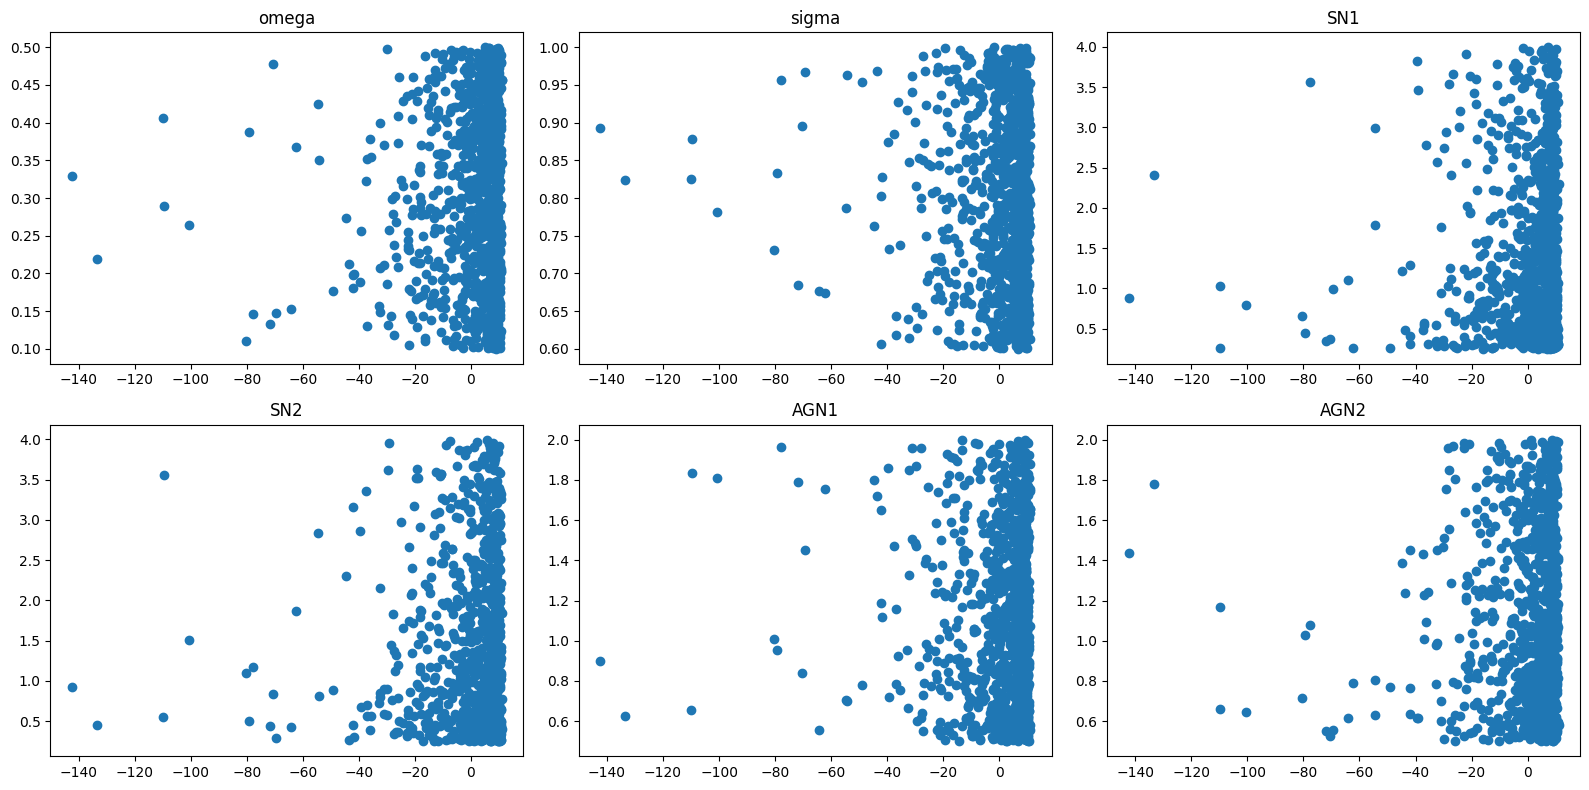

In [57]:
# pc1 real part
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0,0].set_title('omega')
axs[0,1].set_title('sigma')
axs[0,2].set_title('SN1')
axs[1,0].set_title('SN2')
axs[1,1].set_title('AGN1')
axs[1,2].set_title('AGN2')

axs[0,0].scatter((joint_pcs[:,0]).real,params['omega'])
axs[0,1].scatter((joint_pcs[:,0]).real,params['sigma'])
axs[0,2].scatter((joint_pcs[:,0]).real,params['SN1'])
axs[1,0].scatter((joint_pcs[:,0]).real,params['SN2'])
axs[1,1].scatter((joint_pcs[:,0]).real,params['AGN1'])
axs[1,2].scatter((joint_pcs[:,0]).real,params['AGN2'])


fig.tight_layout()
fig.show()

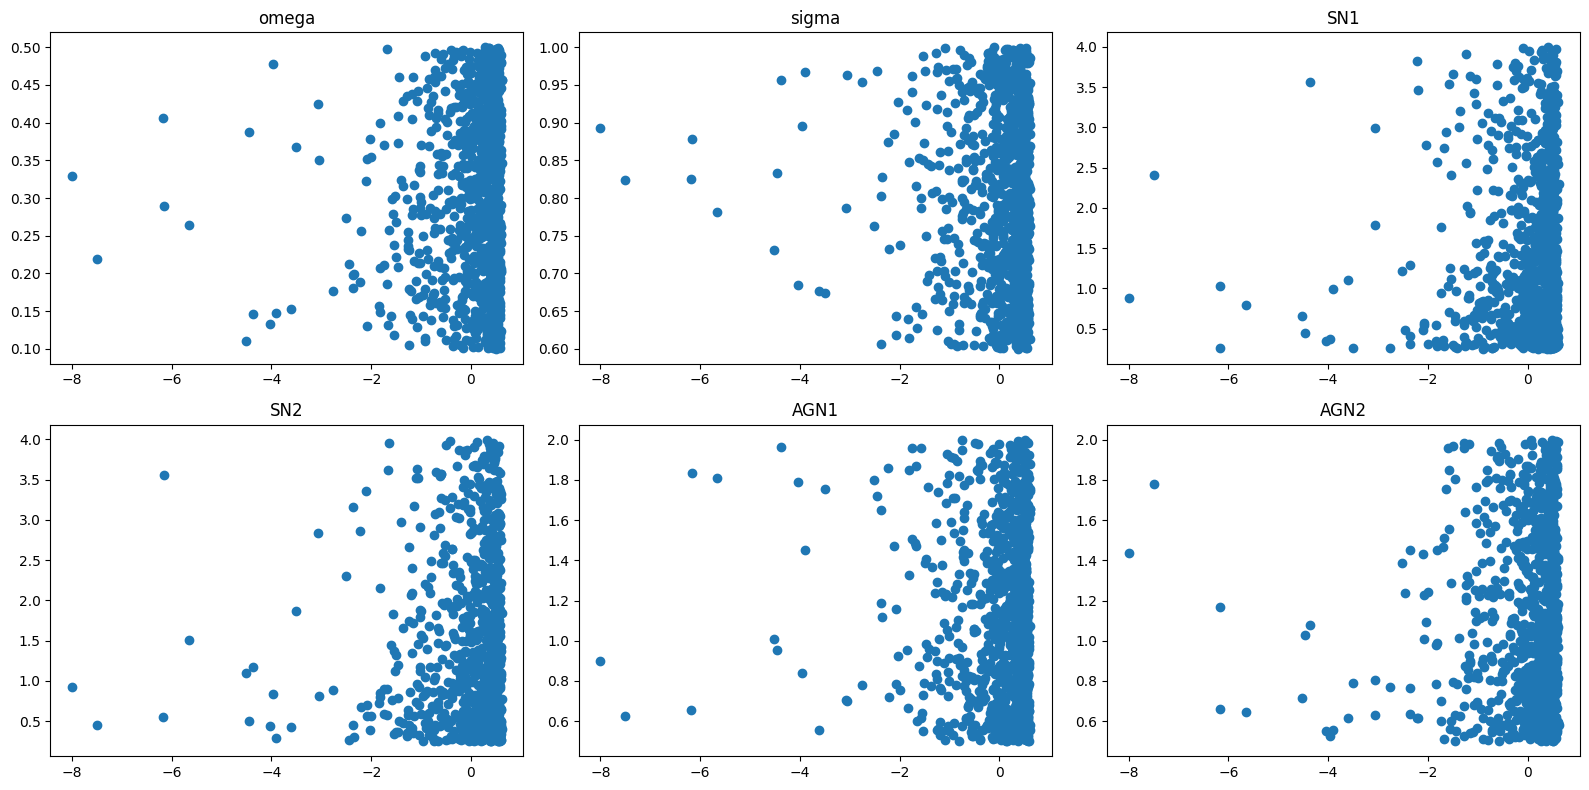

In [58]:
# pc1 imag part
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0,0].set_title('omega')
axs[0,1].set_title('sigma')
axs[0,2].set_title('SN1')
axs[1,0].set_title('SN2')
axs[1,1].set_title('AGN1')
axs[1,2].set_title('AGN2')

axs[0,0].scatter((joint_pcs[:,0]).imag,params['omega'])
axs[0,1].scatter((joint_pcs[:,0]).imag,params['sigma'])
axs[0,2].scatter((joint_pcs[:,0]).imag,params['SN1'])
axs[1,0].scatter((joint_pcs[:,0]).imag,params['SN2'])
axs[1,1].scatter((joint_pcs[:,0]).imag,params['AGN1'])
axs[1,2].scatter((joint_pcs[:,0]).imag,params['AGN2'])


fig.tight_layout()
fig.show()

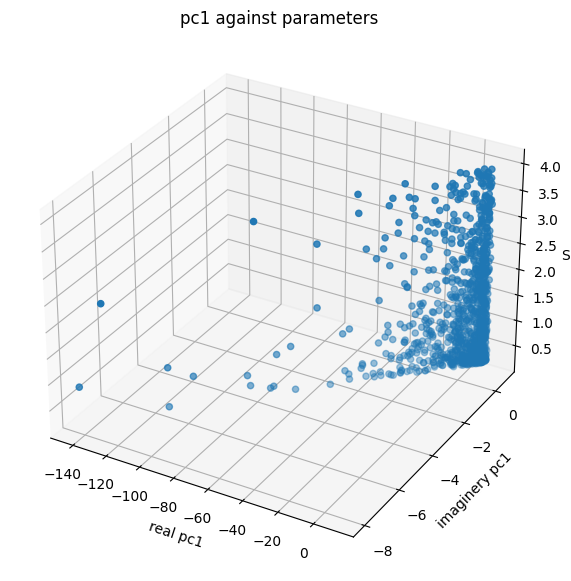

In [98]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D((joint_pcs[:,0]).real, (joint_pcs[:,0]).imag, params['SN1'])
ax.set_xlabel('real pc1')
ax.set_ylabel('imaginery pc1')
ax.set_zlabel('SN1')
plt.title("pc1 against parameters")
plt.show()

Text(0, 0.5, 'pc1 imaginary')

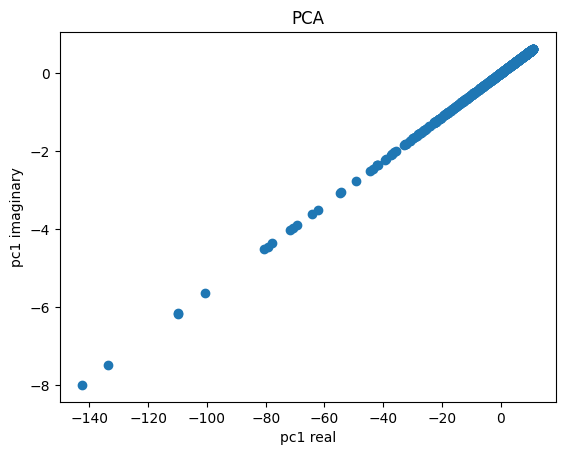

In [60]:
plt.scatter((joint_pcs[:,0]).real, (joint_pcs[:,0]).imag)
plt.title('PCA')
plt.xlabel('pc1 real')
plt.ylabel('pc1 imaginary')

In [135]:
joint_weight1 = PCA_weight(wph_joint_coeffs_1000, 2)[0]
pd.DataFrame(joint_weight1)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:906: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(nanvar(values, axis=axis, skipna=skipna, ddof=ddof, mask=mask))


,0
0,-4.673243e-07+0.000000e+00j
1,-1.026914e-08+1.053750e-07j
2,-4.494898e-07-5.306904e-08j
3,-1.668782e-07-7.026926e-08j
4,6.234770e-06+5.347171e-07j
...,...
963,-3.863044e-02-2.171043e-03j
964,-7.946692e-04-4.466070e-05j
965,-2.415002e-03-1.357240e-04j
966,-1.010836e-03-5.680932e-05j
